In [ ]:
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import tensorflow as tf

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [ ]:
#data praperation

data=pd.read_csv('/content/sample_data/mnist_train_small.csv')
dn=np.array(data)
#np.reshape(28,28)

11490434/11490434 [==============================] - 0s 0us/step
shape : (10000, 28, 28)


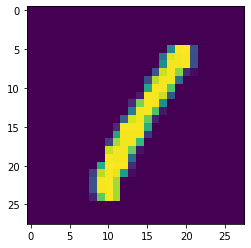

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

number=3
print('shape :',x_test.shape)
plt.imshow(x_train[number])

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
y_train=y_train.reshape(60000,)
print('shape of x_train:',x_train.shape)

shape of x_train: (60000, 784)


In [ ]:
%%time
cls=OneVsRestClassifier(LinearSVC(random_state=2))
cls.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

CPU times: user 2min 9s, sys: 216 ms, total: 2min 9s
Wall time: 2min 13s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OneVsRestClassifier(estimator=LinearSVC(random_state=2))

In [ ]:


%%time
pre=cls.predict(x_test)
print(pre)
cls.score(x_test,y_test)

[7 2 1 ... 4 5 6]
CPU times: user 321 ms, sys: 147 ms, total: 468 ms
Wall time: 261 ms


0.9182

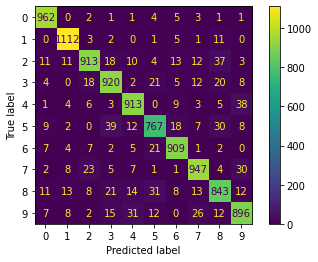

In [ ]:
cm=sklearn.metrics.confusion_matrix(y_test,pre)
cm=sklearn.metrics.ConfusionMatrixDisplay(cm)
cm.plot()

f1 score of one to all cllasification: 0.9169013808656634


(array([0.94871795, 0.95697074, 0.92973523, 0.89668616, 0.91758794,
        0.88979118, 0.93422405, 0.92390244, 0.87357513, 0.89959839]),
 array([0.98163265, 0.97973568, 0.88468992, 0.91089109, 0.92973523,
        0.85986547, 0.94885177, 0.92120623, 0.86550308, 0.88800793]),
 array([0.96489468, 0.96821942, 0.90665343, 0.90373281, 0.92362165,
        0.87457241, 0.9414811 , 0.92255236, 0.86952037, 0.89376559]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

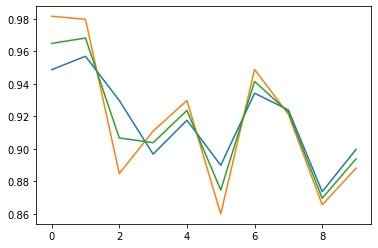

In [ ]:
print('f1 score of one to all cllasification:',sklearn.metrics.f1_score(y_test,pre,average='macro'))
prf=sklearn.metrics.precision_recall_fscore_support(y_test,pre)
for i in range(0,3):
    plt.plot(prf[i])
prf

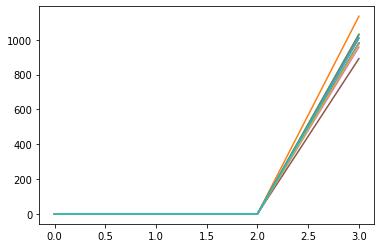

In [ ]:
plt.plot(prf)

In [ ]:

ps=sklearn.metrics.precision_score(y_test,pre,average='macro')
print('presision score :',ps)

rs=sklearn.metrics.recall_score(y_test,pre,average='macro')
print('recall score :',rs)

presision score : 0.9170789217338646
recall score : 0.9170119061473603


In [ ]:
from sklearn.metrics import PrecisionRecallDisplay,precision_recall_curve
#Its for binary classifier
#ps,rs=precision_recall_curve(y_test,pre)

#PrecisionRecallDisplay.from_predictions(y_test,pre).plot()

RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

SyntaxError: ignored